# Import Tensorflow
https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# Grab fashion Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Example of the Data
train_images[0][4]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
         0,   3], dtype=uint8)

# Create Class and Explore Data Shapes
**Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:**

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape,len(train_labels),train_labels,test_images.shape,len(test_labels))

(60000, 28, 28) 60000 [9 0 0 ... 3 0 5] (10000, 28, 28) 10000


# Show Example Image
**The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:**

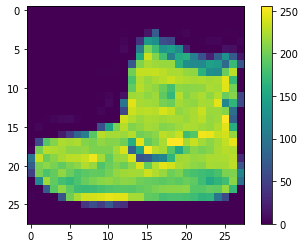

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Scale Images to 0 and 1

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Example of Each Image Category

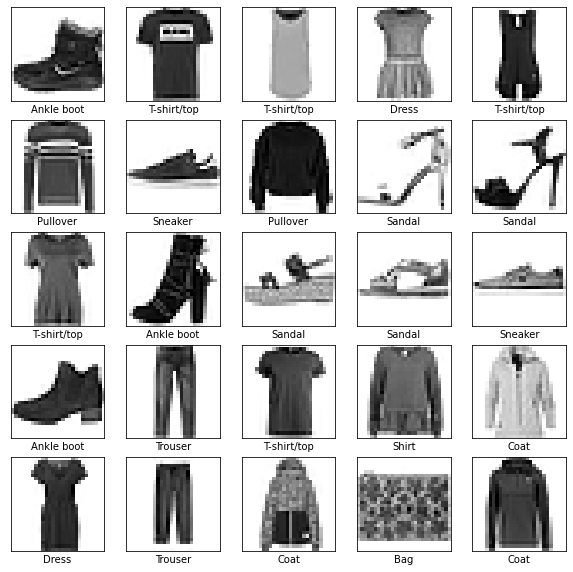

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the Model
**Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:**

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3724 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3336 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3105 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2917 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2775 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2539 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2468 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.235

# Evaluate
**(Notice Overfitting)**

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3366 - accuracy: 0.8856

Test accuracy: 0.8855999708175659


# Make Predictions

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# View Results

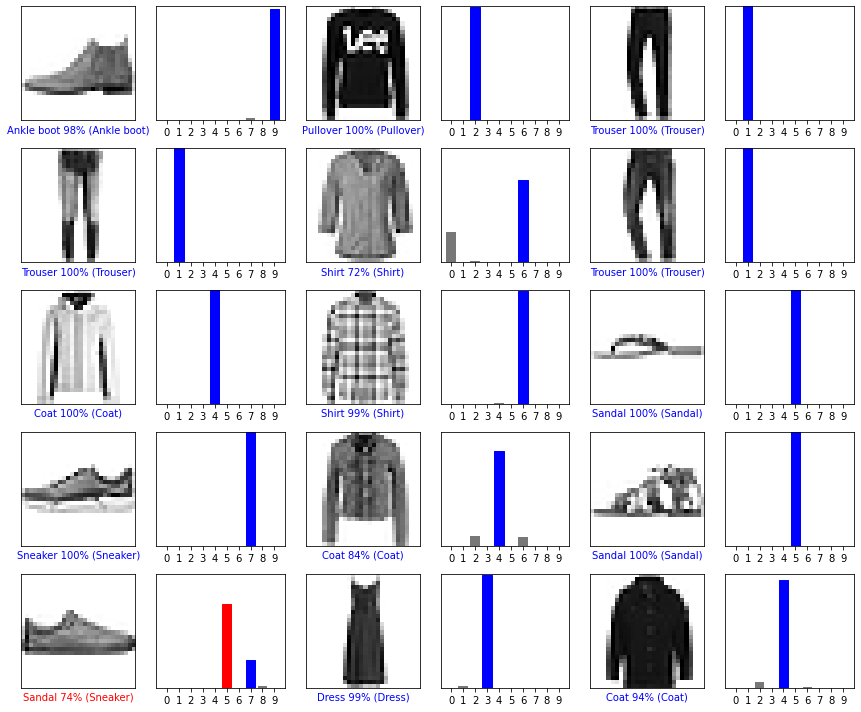

In [11]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Now use CNN Model
**Create the convolutional base**

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (4, 4), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          16416     
Total params: 16,960
Trainable params: 16,960
Non-trainable params: 0
_________________________________________________________________


# Add Dense Layers

In [31]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          16416     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                165952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 183,562
Trainable params: 183,562
Non-trainable params: 0
________________________________________________

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4530 - accuracy: 0.8347 - val_loss: 0.3540 - val_accuracy: 0.8704
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3013 - accuracy: 0.8887 - val_loss: 0.3172 - val_accuracy: 0.8816
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2557 - accuracy: 0.9044 - val_loss: 0.2731 - val_accuracy: 0.9035
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2244 - accuracy: 0.9150 - val_loss: 0.2677 - val_accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1984 - accuracy: 0.9257 - val_loss: 0.2511 - val_accuracy: 0.9088
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1744 - accuracy: 0.9342 - val_loss: 0.2669 - val_accuracy: 0.9060
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1552 - accuracy: 0.9401 - val_loss: 0.2716 -

# View new results

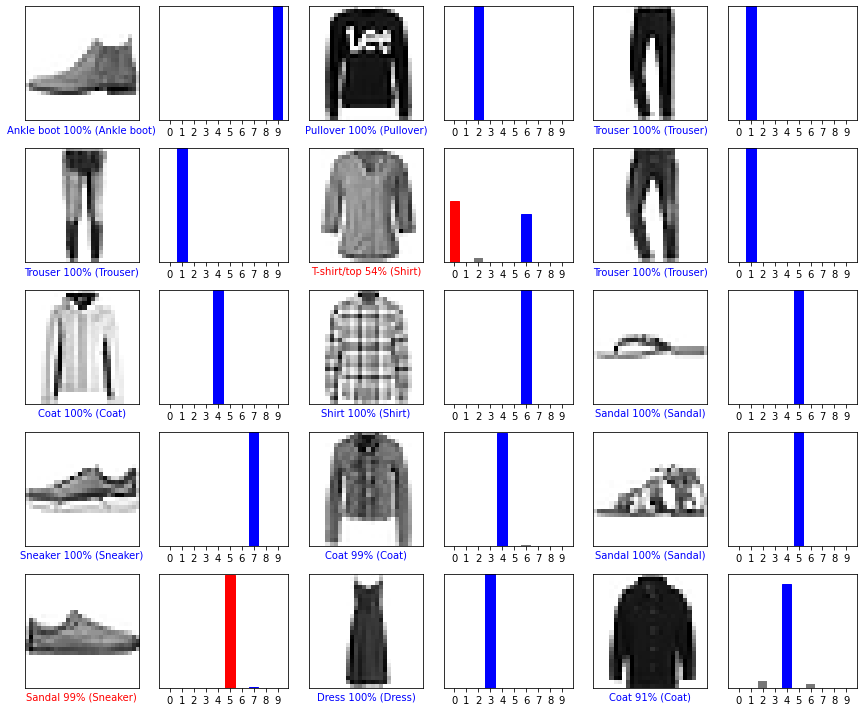

In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()